In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import matplotlib.patheffects
import matplotlib as mpl
import numpy as np
import pandas as pd
import vice

from surp import subgiants
import seaborn as sns
import surp

from surp import AGB_MODELS
import arya
import scipy
from scipy.stats import binned_statistic, norm

/astro/dboyea/.local/lib/python3.11/site-packages/vice-1.4.0.dev0-py3.11-linux-x86_64.egg/vice/__init__.py:141: UserWarning: Using un-released version of VICE
  warnings.warn("Using un-released version of VICE", UserWarning)


# Main Figure

In [3]:
import mw_model_plots

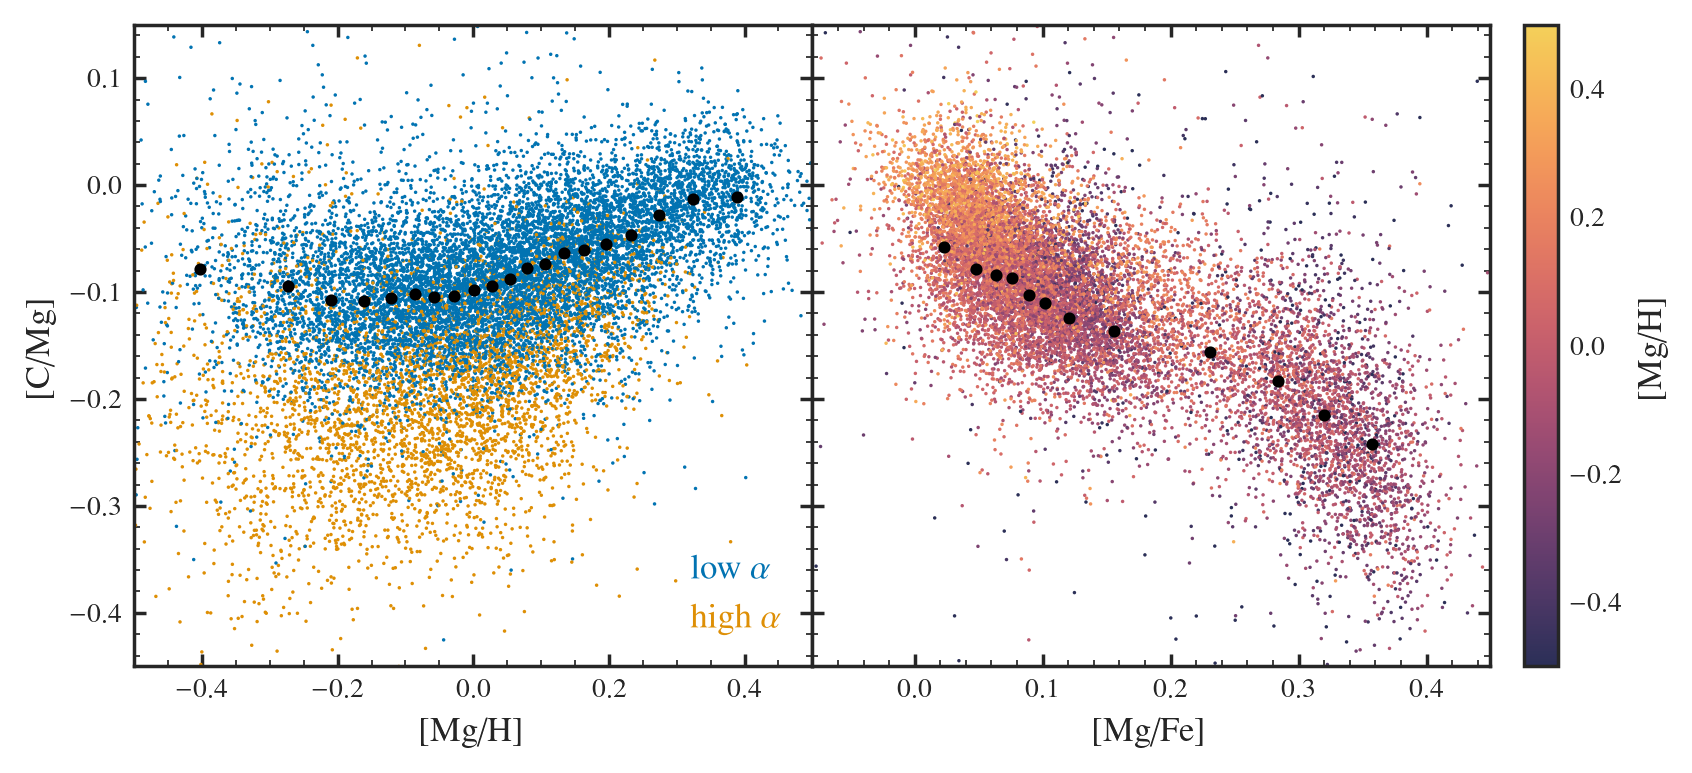

In [19]:
fig, axs = plt.subplots(1, 2, figsize=(7, 10/3), sharey=True, gridspec_kw={"wspace": 0}, dpi=250)


kwargs = dict(
    rasterized=True, ec="none", s=1
)

plt.sca(axs[0])
sns.scatterplot(subgiants, x="MG_H", y="C_MG", hue="high_alpha", **kwargs)
L = arya.Legend(labels=[r"low $\alpha$", r"high $\alpha$"], color_only=True, loc=4)
for text in L.mpl_leg.get_texts():
    text.set_path_effects([mpl.patheffects.Stroke(linewidth=3, foreground='w'),
                       mpl.patheffects.Normal()])

mw_model_plots.zooh_models({}, [],  zorder=3, errorbar=None)
plt.ylabel("[C/Mg]")
plt.xlabel("[Mg/H]")
plt.xlim(-0.5, 0.5)
plt.ylim(-0.45, 0.15)

plt.sca(axs[1])
sns.scatterplot(subgiants, x="MG_FE", y="C_MG", hue="MG_H", hue_norm=(-0.5, 0.5), legend=False,  palette=plt.get_cmap(), **kwargs)
plt.xlim(-0.08, 0.45)


mw_model_plots.zofeo_models({}, [], zorder=3,  errorbar=None)

plt.xlabel("[Mg/Fe]")

cax = axs[1].inset_axes([1.05, 0., 0.05, 1])

arya.Colorbar(clim=(-0.5, 0.5), label="[Mg/H]", cax=cax)
plt.savefig("figures/subgiants.pdf")

In [4]:
print(len(subgiants))

14066


# Covariance

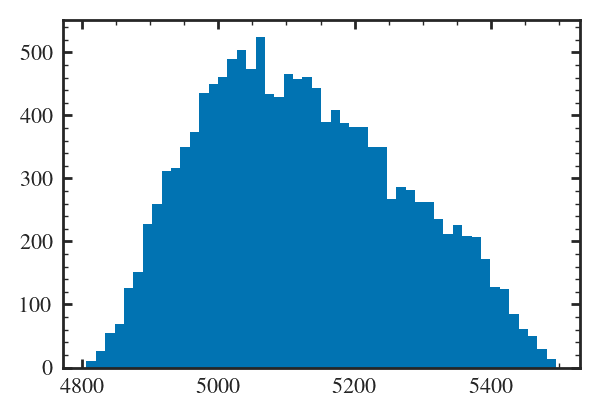

0    -0.075113
1    -0.107613
2    -0.103189
3    -0.113325
4    -0.118093
5    -0.115107
6    -0.114557
7    -0.128830
8    -0.116667
9    -0.116264
10   -0.128578
11   -0.115313
12   -0.109377
13   -0.114354
14   -0.103045
15   -0.110339
16   -0.110223
17   -0.104665
18   -0.096720
19   -0.102950
20   -0.100123
21   -0.092694
22   -0.093876
23   -0.089205
24   -0.083515
25   -0.088437
26   -0.076302
27   -0.071765
28   -0.061003
Name: y, dtype: float64

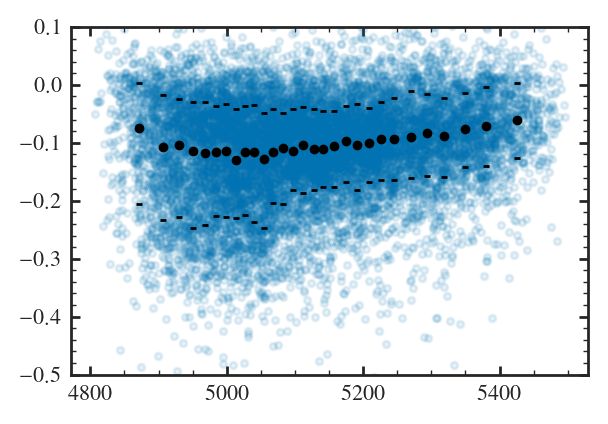

In [36]:
plt.hist(subgiants.TEFF);

plt.show()

plt.scatter(subgiants.TEFF, subgiants.C_MG, alpha=0.1)
plt.ylim(-0.5, 0.1)
arya.medianplot(subgiants, x="TEFF", y="C_MG", color="black", binsize=500).y




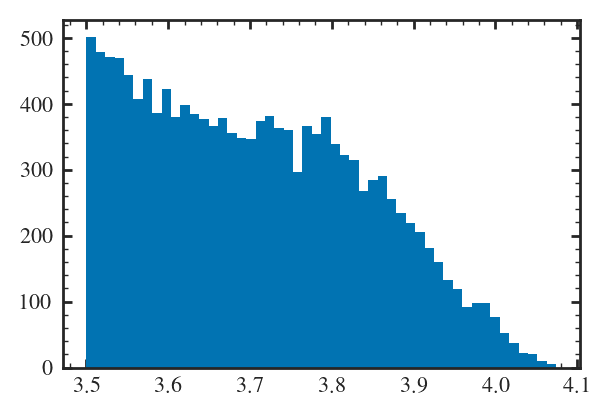

0    -0.104986
1    -0.097723
2    -0.099451
3    -0.101453
4    -0.095393
5    -0.097028
6    -0.100010
7    -0.098542
8    -0.106110
9    -0.112347
10   -0.092694
11   -0.100486
12   -0.095430
13   -0.096812
14   -0.099291
15   -0.109011
16   -0.096203
17   -0.090461
18   -0.096624
19   -0.099733
20   -0.088264
21   -0.102526
22   -0.098355
23   -0.087146
24   -0.093129
25   -0.100731
26   -0.103232
27   -0.111028
28   -0.123821
Name: y, dtype: float64

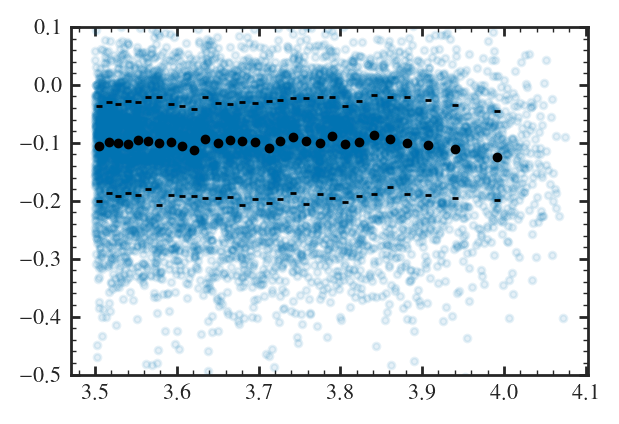

In [37]:
plt.hist(subgiants.LOGG)
plt.show()

plt.scatter(subgiants.LOGG, subgiants.C_MG, alpha=0.1)
plt.ylim(-0.5, 0.1)
arya.medianplot(subgiants, x="LOGG", y="C_MG", color="black", binsize=500).y



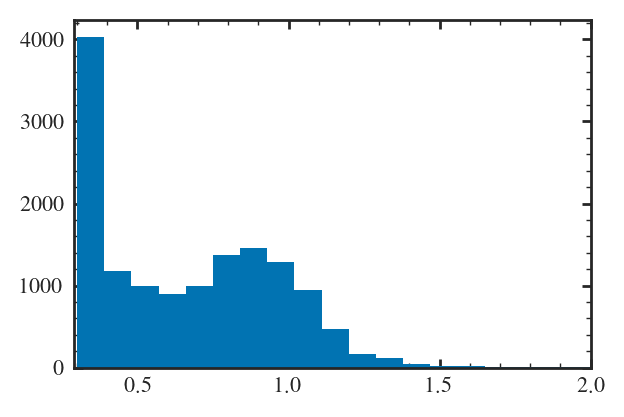

0    -0.037332
1    -0.069391
2    -0.082512
3    -0.076785
4    -0.094943
5    -0.088553
6    -0.089313
7    -0.101424
8    -0.105531
9    -0.108503
10   -0.115870
11   -0.110176
12   -0.102578
13   -0.105823
14   -0.104630
15   -0.113822
16   -0.104015
17   -0.098579
18   -0.094693
19   -0.097120
20   -0.102704
21   -0.098542
22   -0.105038
23   -0.107738
24   -0.105495
25   -0.102950
26   -0.113882
27   -0.108798
28   -0.115526
Name: y, dtype: float64

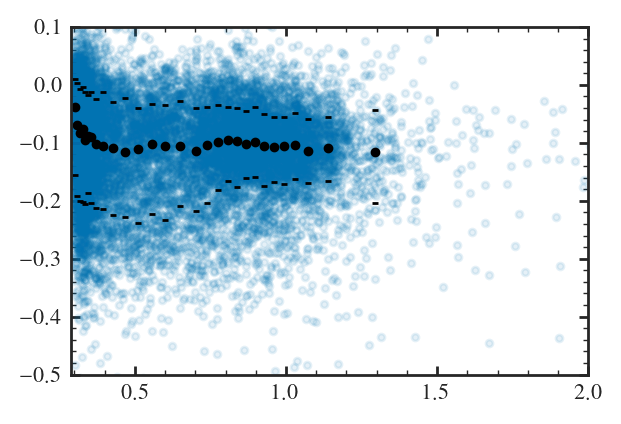

In [38]:
plt.hist(subgiants.VMICRO)
plt.xlim(0.29, 2)
plt.show()

plt.scatter(subgiants.VMICRO, subgiants.C_MG, alpha=0.1)
plt.ylim(-0.5, 0.1)
plt.xlim(0.29, 2)
arya.medianplot(subgiants, x="VMICRO", y="C_MG", color="black", binsize=500).y


## Alpha

(-0.1, 0.5)

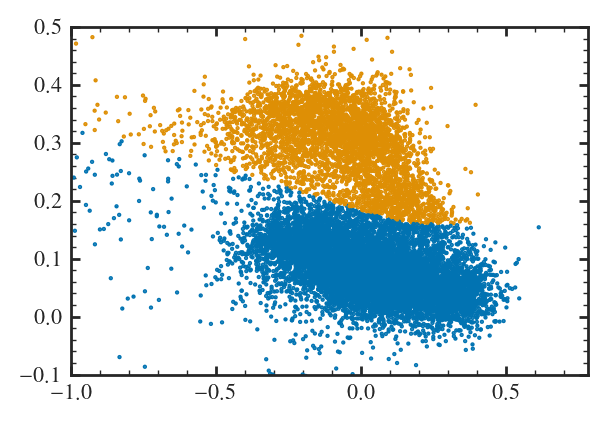

In [10]:
plt.scatter(subgiants.MG_H, subgiants.MG_FE, color=[arya.COLORS[a] for a in subgiants.high_alpha], s=0.3)
plt.xlim(-1)
plt.ylim(-0.1, 0.5)

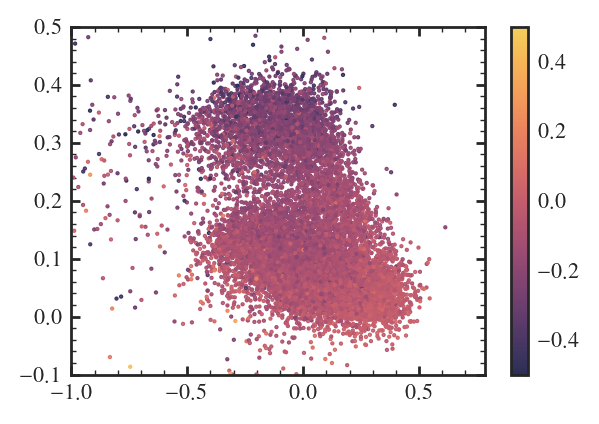

In [20]:
plt.scatter(subgiants.MG_H, subgiants.MG_FE, c=subgiants.C_MG, s=0.3, vmin=-0.5, vmax=0.5)
plt.xlim(-1)
plt.ylim(-0.1, 0.5)
plt.colorbar()

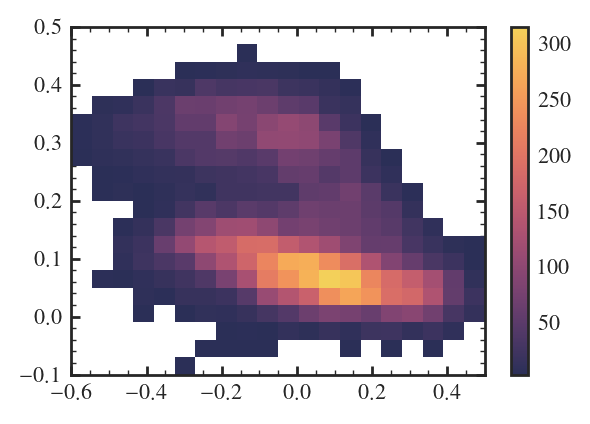

In [18]:
plt.hist2d(subgiants.MG_H, subgiants.MG_FE, range=((-0.6, 0.5), (-0.1, 0.5)), cmin=3, bins=20)
plt.colorbar()

# Radii

In [ ]:
np.nanquantile(subgiants.R_gal, [0.01, 0.16, 0.5, 0.84, 0.99])

In [ ]:
plt.hist(subgiants.R_gal)

In [ ]:
subgiants.age_ANN

In [ ]:
subgiants.columns.values

In [ ]:
plt.hist(subgiants.age_lowess_correct_ANN)
plt.xlabel("ANN age")
plt.ylabel("count")

In [ ]:
plt.scatter(subgiants.age_lowess_correct_ANN, subgiants.age_total_error_ANN, s=1, alpha=0.2)
plt.xlabel("ANN age")
plt.ylabel("err")

In [ ]:
plt.hist(subgiants.age_ANN, histtype="step")
plt.xlabel("ANN age")
plt.ylabel("count")
plt.xlim(0)

In [ ]:
arya.medianplot(subgiants, x="age_ANN", y="C_MG", binsize=600)

# Binned visualization

In [3]:
def cooh_data(ax=None, **params):
    
    ha = subgiants["high_alpha"]
    df = subgiants[~ha]
    
    arya.binnedplot(df, x="MG_H", y="C_MG", binrange=(-0.5, 0.5), binwidth=0.05,
                              cmin=1, stat="median", errorbar="pi",   **params)
    
def coofe_data(o_0=-0.1, w=0.05, ax=None, **kwargs):

        
    filt = subgiants["MG_H"] > o_0 - w
    filt &= subgiants["MG_H"] < o_0 + w
    df = subgiants[filt]
    arya.binnedplot(df, x="MG_FE", y="C_MG", binrange=(-0.1, 0.5),
                              cmin=1, stat="median", errorbar="pi",   **params)

In [4]:
def finite_gaussian_kde(x, y, x_err, y_err, xlims=None, ylims=None, grid_size=100, cutoff=5):
    """
    Compute a 2D KDE using a finite Gaussian kernel.

    Parameters:
    - x, y: Arrays of data point coordinates.
    - x_uncertainties, y_uncertainties: Arrays of standard deviations for the Gaussian kernels.
    - grid_size: The number of points in each dimension for the grid.
    - cutoff: The cutoff in standard deviations for the finite Gaussian kernel.
    """
    # Define the grid
    if xlims is None:
        x_min, x_max = x.min() - cutoff * x_uncertainties.max(), x.max() + cutoff * x_uncertainties.max()
    else:
        x_min, x_max = xlims
        
    if ylims is None:
        y_min, y_max = y.min() - cutoff * y_uncertainties.max(), y.max() + cutoff * y_uncertainties.max()
    else:
        y_min, y_max = ylims
        
    x_grid = np.linspace(x_min, x_max, grid_size)
    y_grid = np.linspace(y_min, y_max, grid_size)
    x_mesh, y_mesh = np.meshgrid(x_grid, y_grid)

    # Initialize the KDE grid
    kde = np.zeros_like(x_mesh)

    # Vectorized computation of the finite Gaussian kernel
    for xi, yi, x_ui, y_ui in zip(x, y, x_err, y_err):
        # Determine the range affected by this point's kernel
        x_range = np.logical_and(x_grid >= xi - cutoff * x_ui, x_grid <= xi + cutoff * x_ui)
        y_range = np.logical_and(y_grid >= yi - cutoff * y_ui, y_grid <= yi + cutoff * y_ui)

        # Compute the kernel only within the cutoff range
        x_kernel = np.exp(-0.5 * ((x_grid[x_range] - xi) / x_ui) ** 2) / (x_ui * np.sqrt(2 * np.pi))
        y_kernel = np.exp(-0.5 * ((y_grid[y_range] - yi) / y_ui) ** 2) / (y_ui * np.sqrt(2 * np.pi))

        # Update the KDE grid
        kde[np.ix_(y_range, x_range)] += np.outer(y_kernel, x_kernel)

    return x_mesh, y_mesh, kde

In [5]:
x = subgiants.MG_H.values
y = subgiants.C_MG.values
x_err = subgiants.MG_H_ERR.values
y_err = subgiants.C_MG_ERR.values
percens = np.linspace(0, 100, 10)
bins = np.percentile(x, percens)
weights = 1/subgiants.C_MG_ERR**2

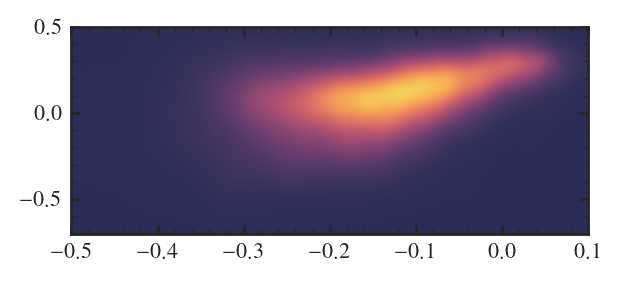

In [6]:
filt = np.full(x.shape, True)

x_grid, y_grid, kde = finite_gaussian_kde(x[filt], y[filt], x_err[filt], y_err[filt], ylims=(-0.5, 0.1), xlims=(-0.7, 0.5), grid_size=1024)
plt.imshow(kde, origin="lower", extent=[-0.5, 0.1, -0.7, 0.5], aspect=0.2)

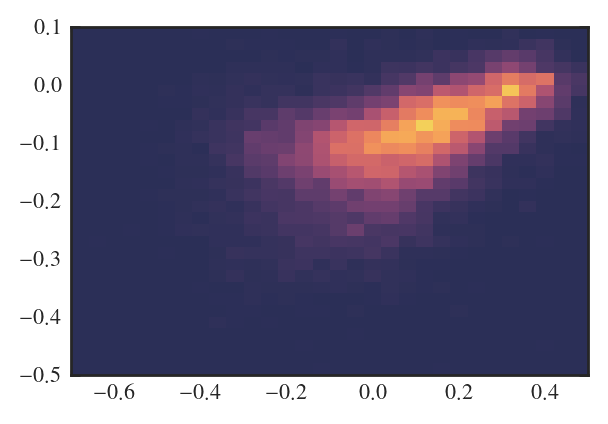

In [7]:
plt.hist2d(x, y, 30,  range=([-0.7, 0.5], [-0.5, 0.1]), weights=weights);

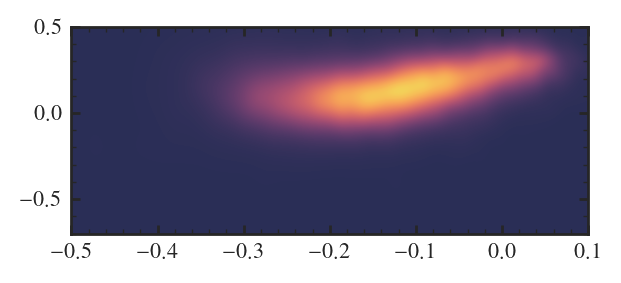

In [8]:
filt = ~subgiants.high_alpha

x_grid, y_grid, kde = finite_gaussian_kde(x[filt], y[filt], x_err[filt], y_err[filt], ylims=(-0.5, 0.1), xlims=(-0.7, 0.5), grid_size=1024)
plt.imshow(kde, origin="lower", extent=[-0.5, 0.1, -0.7, 0.5], aspect=0.2)

In [9]:
import json

In [10]:
np.save("kde_lowa.npy", kde)
with open("kde_lowa.json", "w") as f:
    json.dump({"N": 1024}, f)
    json.dump({"extent": [x_grid[0,0], x_grid[-1,-1], y_grid[0,0], y_grid[-1,-1]]}, f)

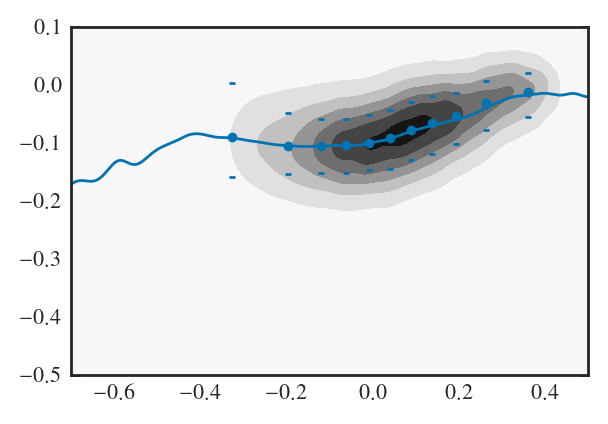

In [11]:
plt.plot(x_grid[0, :], np.sum(kde * y_grid, axis=0) / np.sum(kde, axis=0))
plt.contourf(x_grid, y_grid, kde, cmap="Greys")
arya.medianplot(subgiants[~subgiants.high_alpha], "MG_H", "C_MG", binsize=1000)

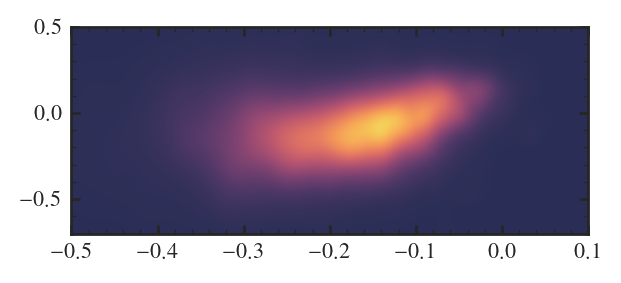

In [12]:
filt = subgiants.high_alpha

x_grid, y_grid, kde = finite_gaussian_kde(x[filt], y[filt], x_err[filt], y_err[filt], ylims=(-0.5, 0.1), xlims=(-0.7, 0.5), grid_size=300)
plt.imshow(kde, origin="lower", extent=[-0.5, 0.1, -0.7, 0.5], aspect=0.2)

In [13]:

x = subgiants.MG_FE
x_err = subgiants.MG_FE_ERR

In [14]:
filt = surp

x_grid, y_grid, kde = finite_gaussian_kde(x[filt], y[filt], x_err[filt], y_err[filt], ylims=(-0.5, 0.1), xlims=(-0.1, 0.5), grid_size=300)


KeyError: <module 'surp' from '/arc7/home/dboyea/surp/surp/__init__.py'>

In [ ]:
plt.imshow(kde, origin="lower", extent=[-0.1, 0.5, -0.5, 0.1], aspect=0.7, cmap="Greys", alpha=0.5)

In [ ]:
plt.hist2d(x, y,50,  range=([-0.1, 0.5], [-0.5, 0.1]));

In [ ]:
plt.contourf(x_grid, y_grid, kde, levels=100, cmap="Greys")
plt.colorbar()

In [ ]:
plt.imshow(kde, origin="lower")

In [ ]:
plt.contourf(x_grid, y_grid, kde)

In [ ]:
plt.scatter(xs, ys)
plt.scatter(xs, yl)
plt.scatter(xs, yh)

In [ ]:
plt.scatter(x, y)

# median vs mode

In [ ]:
x = subgiants.MG_H
y = subgiants.C_MG

In [ ]:
def calc_mode(x):
    kernel = scipy.stats.gaussian_kde(x)
    x_model = np.linspace(np.nanmin(x), np.nanmax(x), 1000)
    y_model = kernel(x_model)
    return x_model[np.argmax(y_model)]

In [ ]:
for x0 in np.arange(-0.5, 0.51, 0.1):
    w = 0.05
    f = x0-w < x 
    f &= x < x0 + w
    
    kernel = scipy.stats.gaussian_kde(y[f])
    plt.hist(y[f], 30, density=True)
    x_pred = np.linspace(-1, 1, 1000)
    plt.plot(x_pred, kernel(x_pred), label="kde")
    plt.axvline(np.median(y[f]), color=arya.COLORS[3], label="median")
    plt.axvline(calc_mode(y[f]), color=arya.COLORS[4], label="model")
    
    plt.xlim(-0.5, 0.2)
    plt.title(f"M/H = {x0:0.2f}")
    plt.xlabel("[C/Mg]")
    plt.legend()

    plt.show()

In [ ]:

arya.medianplot(subgiants[~subgiants.high_alpha], "MG_H", "C_MG", binsize=1000)
x = subgiants.MG_H
bins = np.arange(-0.45, 0.5, 0.08)
x_bin = (bins[1:] + bins[:-1])/2
y_bin = [calc_mode(y[(bins[i] < x) & (x < bins[i+1])]) for i in range(len(x_bin))]

plt.plot(x_bin, y_bin, color=arya.COLORS[1])

In [ ]:

arya.medianplot(subgiants, "MG_FE", "C_MG", binsize=1000)

x = subgiants.MG_FE
bins = np.arange(-0.1, 0.5, 0.05)
x_bin = (bins[1:] + bins[:-1])/2
y_bin = [calc_mode(y[(bins[i] < x) & (x < bins[i+1])]) for i in range(len(x_bin))]

plt.scatter(x_bin, y_bin, color=arya.COLORS[2])

## Median binning 

In [ ]:
bins = 

/tmp/ipykernel_243050/4001876099.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["C_Cm"] = df.C_MG - C_MG_m
/tmp/ipykernel_243050/4001876099.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["C_Cm"] = df.C_MG - C_MG_m
/tmp/ipykernel_243050/4001876099.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gui

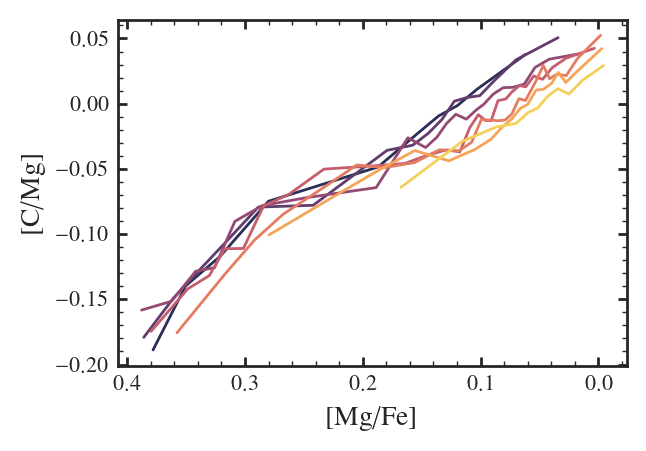

In [21]:
fig, ax = plt.subplots(figsize=(10/3, 10/3/2**0.5))

cb = arya.HueMap( clim=(-0.3, 0.3))

for MH in (-0.3, -0.2,-0.1,0, 0.1, 0.2,0.3):
    mh0 = MH - 0.05
    mh1 = MH + 0.05
    filt = subgiants.MG_H > mh0
    filt &= subgiants.MG_H < mh1
    df = subgiants[filt]

    C_MG_m = np.median(df.C_MG[~df.high_alpha])

    df["C_Cm"] = df.C_MG - C_MG_m
    
    arya.medianplot(df, x="MG_FE", y="C_Cm", binsize=100, color=cb(MH), aes="line", errorbar=None)

plt.gca().invert_xaxis()

plt.xlabel("[Mg/Fe]")
plt.ylabel("[C/Mg]")

plt.tight_layout()
plt.savefig("figures/apogee_caafe_binned.pdf")

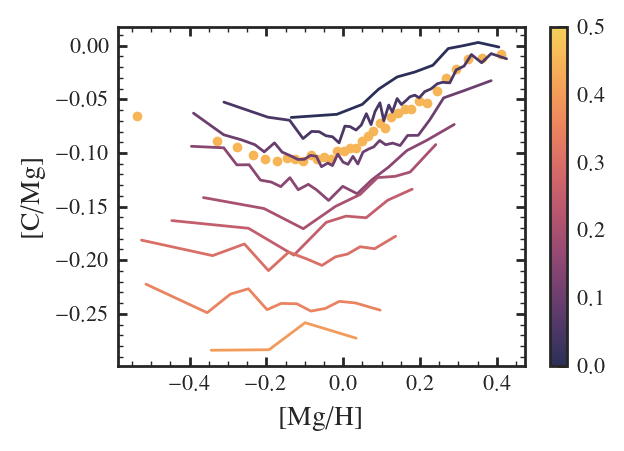

In [47]:
fig, ax = plt.subplots(figsize=(10/3, 10/3/2**0.5))

cb = arya.HueMap( clim=(0, 0.5))

dw = 0.025
for afe in np.arange(0, 0.5, 2*dw):
    mh0 = afe - dw
    mh1 = afe + dw
    filt = subgiants.MG_FE > mh0
    filt &= subgiants.MG_FE < mh1
    df = subgiants[filt]

    #C_MG_m = np.median(df.C_MG[~df.high_alpha])

    #df["C_Cm"] = df.C_MG# - C_MG_m
    
    arya.medianplot(df, x="MG_H", y="C_MG", binsize=100, color=cb(afe), aes="line", errorbar=None, stat="median")


arya.medianplot(subgiants[~subgiants.high_alpha], x="MG_H", y="C_MG", binsize=300, color=cb(afe), aes="scatter", stat="median", errorbar=None)


plt.colorbar(cb._mpl, ax=plt.gca())

plt.xlabel("[Mg/H]")
plt.ylabel("[C/Mg]")

plt.tight_layout()
plt.savefig("figures/apogee_caah_binned.pdf")

In [ ]:
fig, ax = plt.subplots(figsize=(10/3, 10/3/2**0.5))

cb = arya.HueMap( clim=(-0.3, 0.3))

for MH in (-0.3, -0.2,-0.1,0, 0.1, 0.2,0.3):
    mh0 = MH - 0.05
    mh1 = MH + 0.05
    filt = subgiants.MG_H > mh0
    filt &= subgiants.MG_H < mh1
    df = subgiants[filt]
    
    arya.medianplot(df, x="MG_FE", y="C_MG", binsize=100, color=cb(MH), aes="line", errorbar=None)

plt.gca().invert_xaxis()

plt.xlabel("[Mg/Fe]")
plt.ylabel("[C/Mg]")

plt.tight_layout()
plt.savefig("figures/apogee_caafe_binned.pdf")

In [ ]:
plt.scatter(subgiants.age, subgiants.C_MG, s=0.3, alpha=0.1)
plt.gca().invert_xaxis()
plt.ylim(-0.5, 0.5)


#